In [7]:
from keras.datasets import mnist

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
import tensorflow as tf

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical


In [10]:
import numpy as np

In [11]:
# to calculate accuracy
from sklearn.metrics import accuracy_score

In [12]:
from keras.layers import Dense, Activation, Flatten

In [13]:
######CNN-DIGITS IN GRAY SCALE

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
X_train.shape[0]

60000

In [15]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [16]:
X_train.shape

(60000, 28, 28, 1)

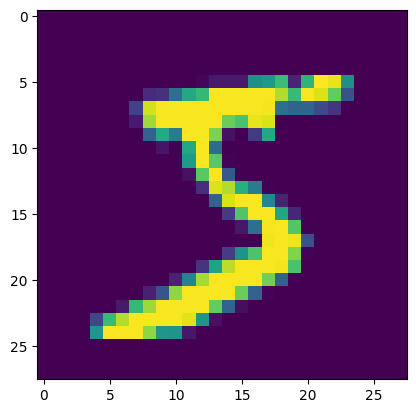

In [17]:
#See some images of the data set
plt.imshow(X_train[0])

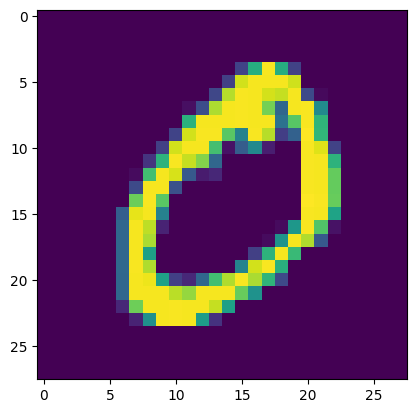

In [18]:
#See some images of the data set
plt.imshow(X_train[1])

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [20]:
display(X_train)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [21]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [22]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (60000,)


In [24]:
Y_train = to_categorical(y_train, num_classes=n_classes)
Y_test = to_categorical(y_test, num_classes=n_classes)

print("Shape after one-hot encoding: ", Y_train.shape)

Shape after one-hot encoding:  (60000, 10)


In [25]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 85ms/step - accuracy: 0.8900 - loss: 0.3809 - val_accuracy: 0.9714 - val_loss: 0.0924
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9803 - loss: 0.0640 - val_accuracy: 0.9791 - val_loss: 0.0633
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9902 - loss: 0.0356 - val_accuracy: 0.9823 - val_loss: 0.0531
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9934 - loss: 0.0221 - val_accuracy: 0.9840 - val_loss: 0.0518
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.9961 - loss: 0.0136 - val_accuracy: 0.9838 - val_loss: 0.0530
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.9977 - loss: 0.0094 - val_accuracy: 0.9832 - val_loss: 0.0578
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 96ms/step - accuracy: 0.9980 - loss: 0.0074 - val_accuracy: 0.9815 - val_loss: 0.0622
Epoch 8/10


In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
Y_train.shape

(60000, 10)

In [ ]:
########################################################################
#########################CIFAR-10 Dataset using CNNs####################
########################################################################

In [ ]:
from keras.datasets import cifar10

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils

In [ ]:
# to calculate accuracy
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Activation, Flatten

In [ ]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
#Dimension of training set
X_train.shape

(50000, 32, 32, 3)

In [ ]:
display(X_train[1])

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

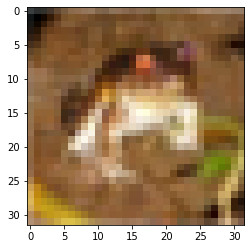

In [ ]:
#See some images of the data set
plt.imshow(X_train[0])

In [ ]:
display(y_train)

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
# # building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()